### 시각화 라이브러리 꺼내오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Line plot

#### plot 함수
- 선 그래프를 그려주는 함수

In [2]:
np.random.seed(3)
x=np.arange(1,6) # 1 ~ 5
y=np.random.randint(1,10,size=5)
print(x)
print(y)

[1 2 3 4 5]
[9 4 9 9 1]


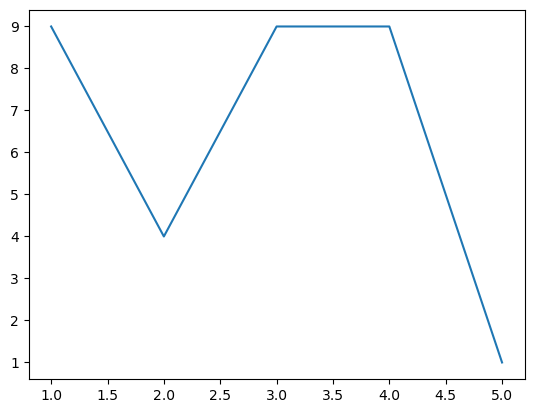

In [3]:
plt.plot(x,y)
plt.show() # 그래프를 그려주는 함수 

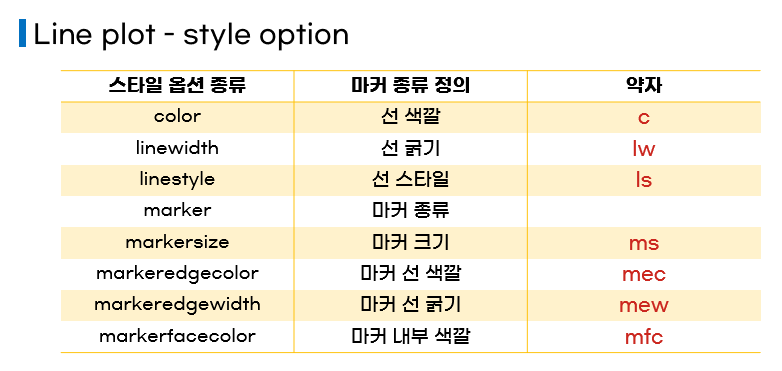

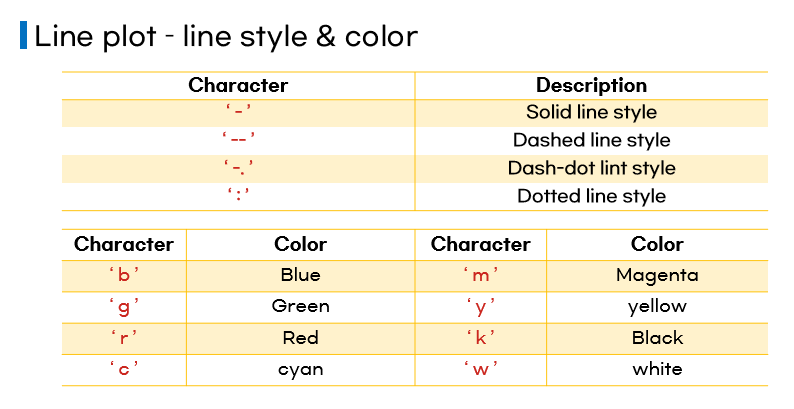

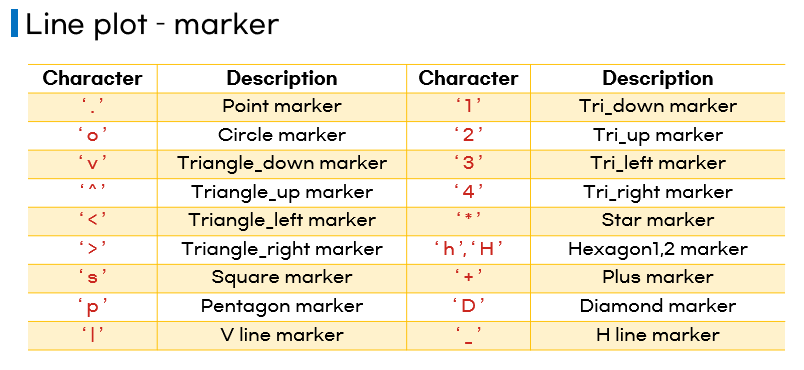

In [4]:
# matplotlib 에서 지원되는 색상 목록
# https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors  doc제공 코드
import math
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

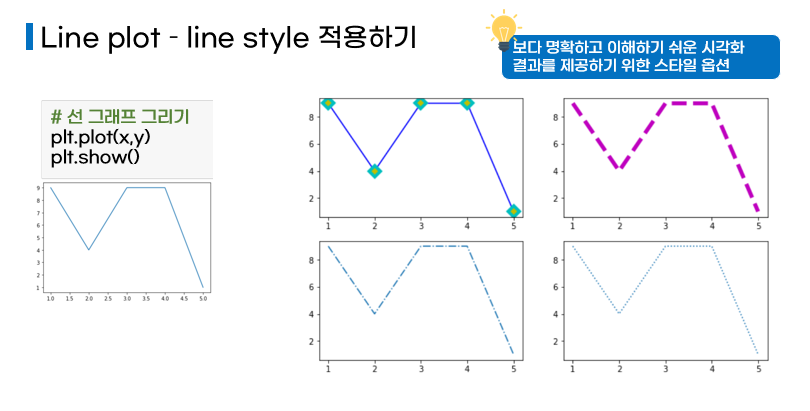

<function matplotlib.pyplot.show(close=None, block=None)>

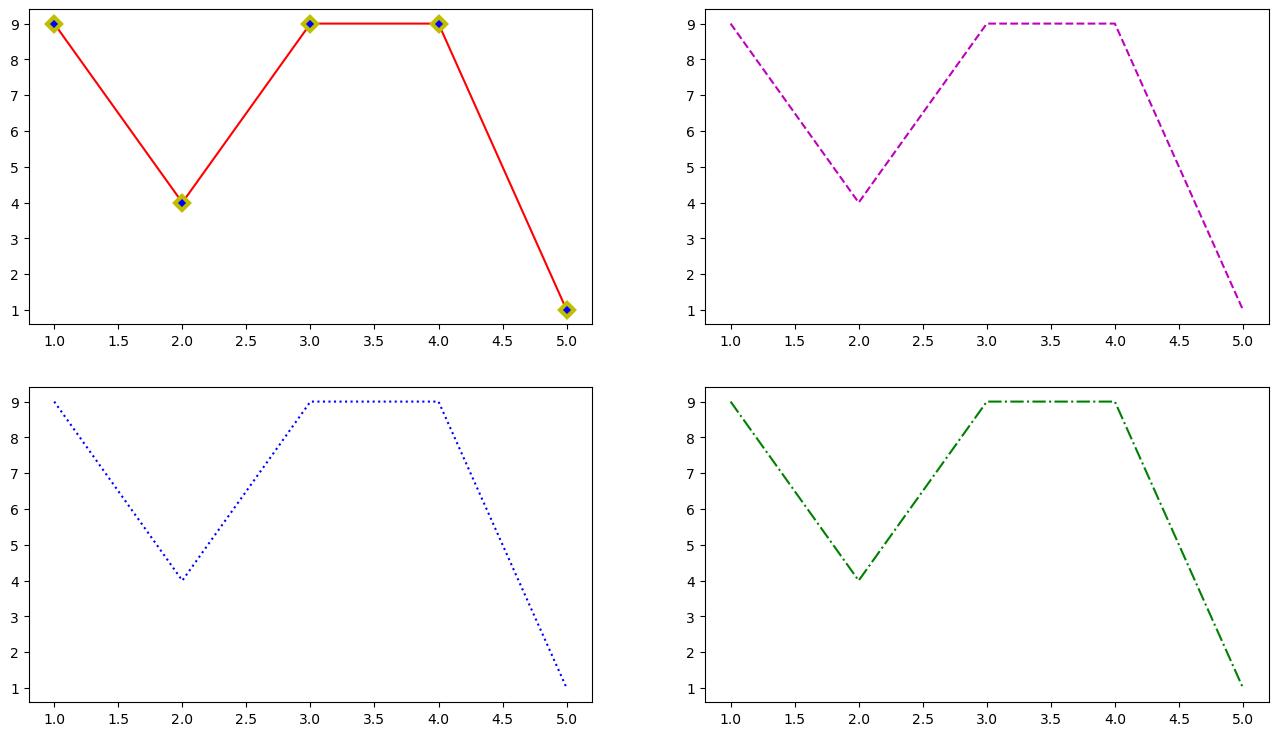

In [5]:
# 선 스타일 변경해보기
plt.figure(figsize=(16,9)) # figsize 단위 : inch 
plt.subplot(2,2,1) # 2행 2열 1번째 그래프
plt.plot(x,y,ls='-',color='r',marker='D',ms=7,mec='y',mew=3,mfc='b')
plt.subplot(2,2,2)
plt.plot(x,y,ls='--',color='m',marker='',ms=7,mec='y',mew=3,mfc='b')
plt.subplot(2,2,3)
plt.plot(x,y,ls=':',color='b',marker='',ms=7,mec='y',mew=3,mfc='b')
plt.subplot(2,2,4)
plt.plot(x,y,ls='-.',color='g',marker='',ms=7,mec='y',mew=3,mfc='b')
plt.show # 여러개의 그래프를 한 창에 표현할때는 plt.show 한 번만 타이핑

#### show() 사용하기

<function matplotlib.pyplot.show(close=None, block=None)>

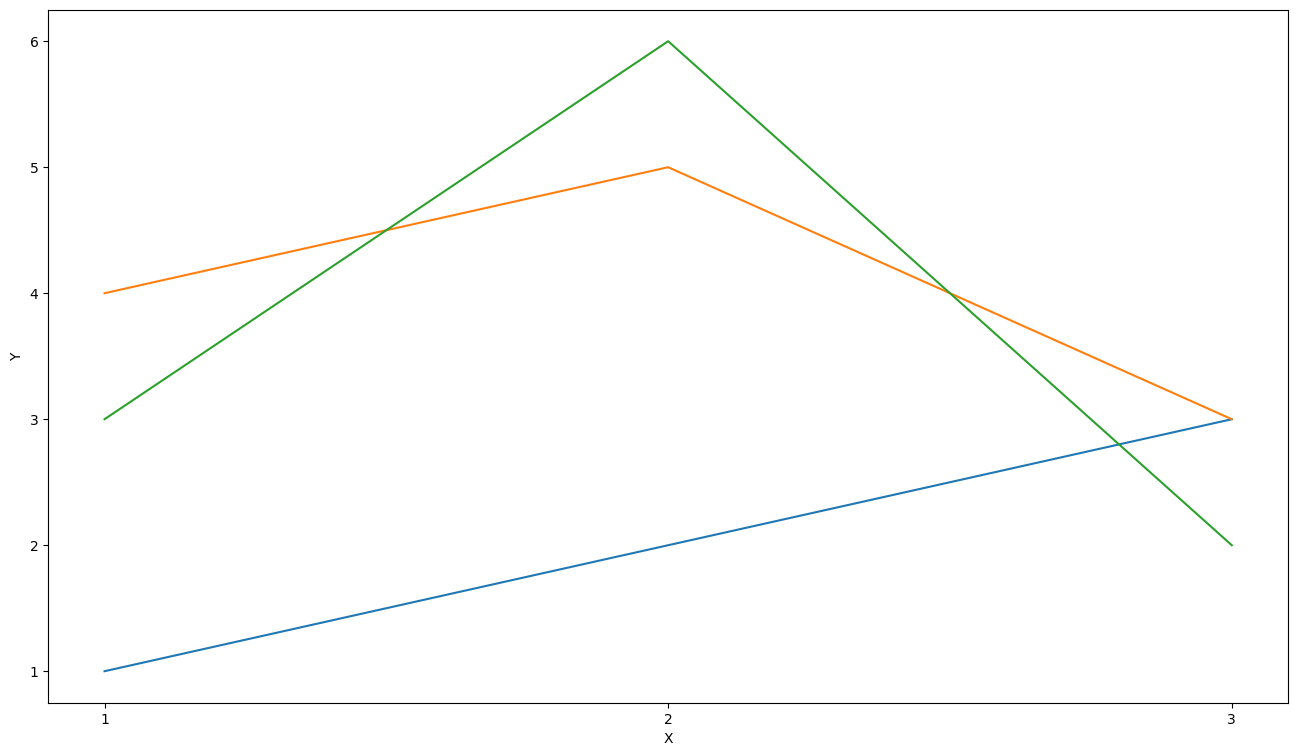

In [6]:
# 여러개의 그래프를 한 창에 그리기
plt.figure(figsize=(16,9)) # figsize 단위 : inch 
x=np.arange(1,4) # 1, 2, 3, 4
y1=np.array([1,2,3])
y2=np.array([4,5,3])
y3=np.array([3,6,2])

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

plt.xticks(x)
plt.xlabel('X')
plt.ylabel('Y')
plt.show

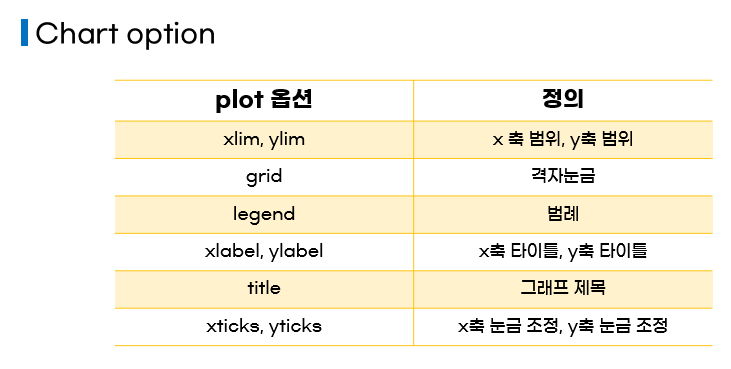

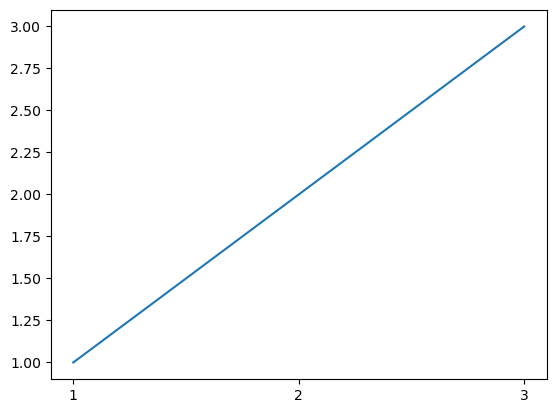

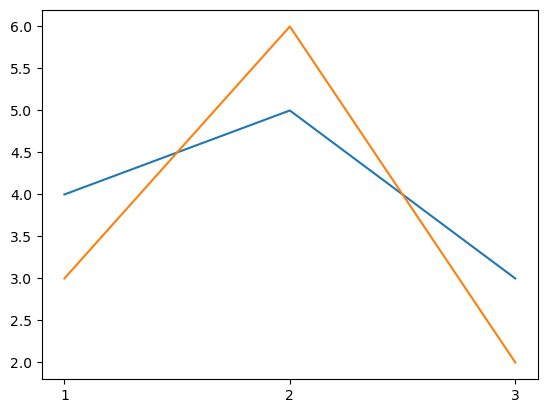

In [7]:
# 여러 창으로 그래프를 나눠서 그리기
plt.plot(x,y1)
plt.xticks(x)
plt.show()

plt.plot(x,y2)
plt.plot(x,y3)
plt.xticks(x)
plt.show()

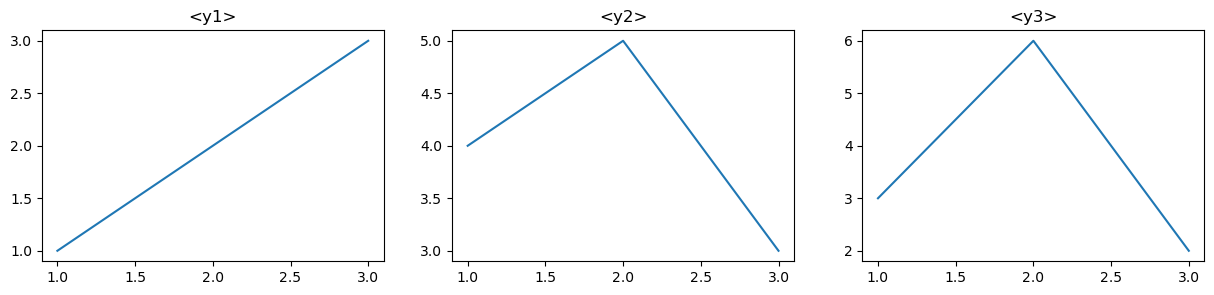

In [8]:
# subplot => 1창에 칸 나눠서 3개의 그래프를 표현
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.plot(x,y1)
plt.title('<y1>')

plt.subplot(1,3,2)
plt.plot(x,y2)
plt.title('<y2>')

plt.subplot(1,3,3)
plt.plot(x,y3)
plt.title('<y3>')

plt.show()

#### 인구데이터 실습
- kosis 국가통계포털 장래 인구변동 데이터
- 년도별 출생아수, 사망자수 정보를 가지고와서 line plot 시각화

In [9]:
# 데이터 불러오기
data=pd.read_csv('./data/장래_인구변동_KOSIS.csv',encoding='euc_kr',index_col='인구변동요인별')
data

,2020,2030,2040,2050,2060,2070
인구변동요인별,,,,,,
인구(천명),51836,51199,50193,47359,42617,37656
출생아수(천명),275,305,286,236,181,196
사망자수(천명),308,408,527,680,741,702


In [10]:
# 데이터 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 인구(천명) to 사망자수(천명)
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2020    3 non-null      int64
 1   2030    3 non-null      int64
 2   2040    3 non-null      int64
 3   2050    3 non-null      int64
 4   2060    3 non-null      int64
 5   2070    3 non-null      int64
dtypes: int64(6)
memory usage: 168.0+ bytes


In [11]:
data.index

Index(['인구(천명)', '출생아수(천명)', '사망자수(천명)'], dtype='object', name='인구변동요인별')

In [12]:
data.iloc[1]

2020    275
2030    305
2040    286
2050    236
2060    181
2070    196
Name: 출생아수(천명), dtype: int64

In [13]:
x=range(2020,2071,10)
# 출생아수 데이터 접근
y1=data.iloc[1]
# 사망자수 데이터 접근
y2=data.iloc[2]
display(x,y1,y2)

range(2020, 2071, 10)

2020    275
2030    305
2040    286
2050    236
2060    181
2070    196
Name: 출생아수(천명), dtype: int64

2020    308
2030    408
2040    527
2050    680
2060    741
2070    702
Name: 사망자수(천명), dtype: int64

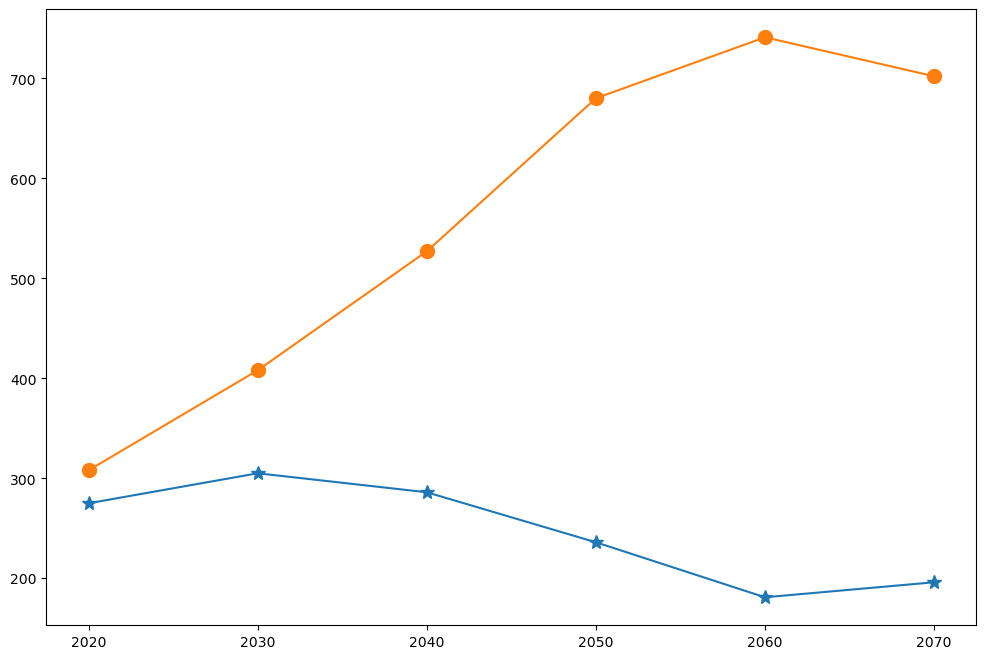

In [14]:
plt.figure(figsize=(12,8))
plt.plot(x,y1,marker='*',ms=10)
plt.plot(x,y2,marker='o',ms=10)
plt.show()

In [15]:
# 한글 출력하기 위해 설정
from matplotlib import rc
rc('font',family='Malgun Gothic')

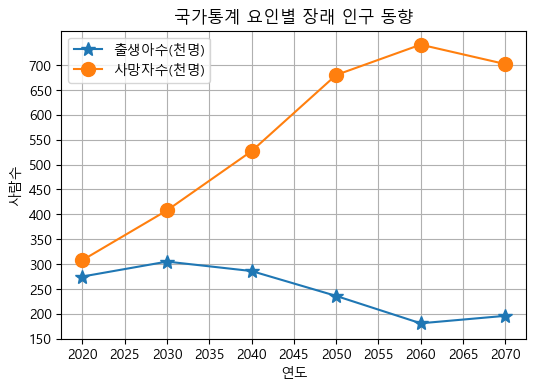

In [16]:
plt.figure(figsize=(6,4))
plt.plot(x,y1,marker='*',ms=10,label='출생아수(천명)')
plt.plot(x,y2,marker='o',ms=10,label='사망자수(천명)')
plt.xticks(range(2020,2071,5))
plt.yticks(range(150,750,50))
plt.title('국가통계 요인별 장래 인구 동향')
plt.xlabel('연도')
plt.ylabel('사람수')
plt.legend()
plt.grid()
plt.show()

### Bar chart
- 막대그래프

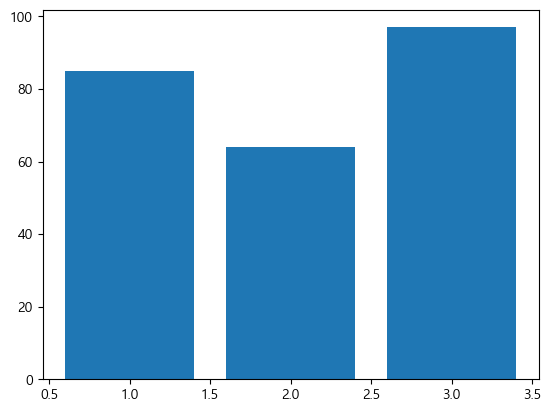

In [17]:
bar_x=np.arange(1,4)
np.random.seed(5)
bar_y=np.random.randint(50,100,size=3)

plt.bar(bar_x,bar_y)
plt.show()

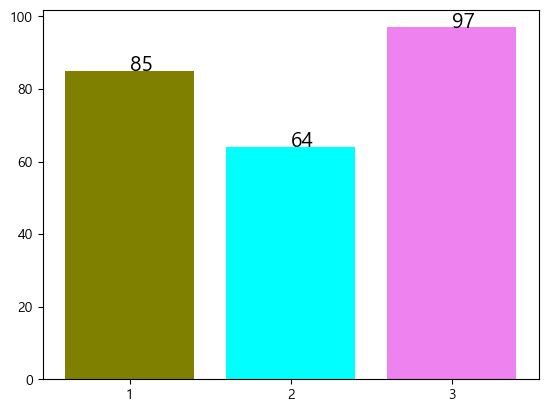

In [18]:
# 그래프 옵션 추가
# 막대그래프 색상 변경, 텍스트 출력
plt.bar(bar_x,bar_y,
       color=['olive','cyan','violet']) # 막대별 색상
for i in range(len(bar_x)):
    plt.text(bar_x[i],bar_y[i],f'{bar_y[i]}',fontdict={'color':'black','size':15})
plt.xticks(range(1,4))
plt.show()

### 최종 예제 : 전국교통사고(2017) 데이터 시각화
- 1. 요일별 교통사고 시각화
- 2. 차대차 사건 중 죽거나 다친 사람이 많은 발생지 시도 시각화
- 3. 교통사고가 많이 발생하는 시간대 시각화 - pie
- 4. 광주지역 법규위반 사항별 사고건수 시각화 - pie

In [19]:
# 천체 컬럼을 생략없이 모두 보기 설정
pd.set_option('display.max_columns',None)

In [20]:
# 데이터 불러오기
acc_data=pd.read_csv('./data/Traffic_Accident_2017.csv',encoding='euc-kr')
acc_data.head(3)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,전남,장성군,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,서울,송파구,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,충남,홍성군,차대차,추돌,추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069


In [21]:
# 데이터 정보 확인
acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

#### 요일별 교통사고 건수 시각화

In [22]:
acc_data['요일']

0       일
1       일
2       일
3       일
4       일
       ..
4060    일
4061    일
4062    일
4063    일
4064    일
Name: 요일, Length: 4065, dtype: object

In [23]:
day=acc_data['요일'].value_counts()
day

화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: 요일, dtype: int64

In [24]:
day=day[['월','화','수','목','금','토','일']]
day

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

In [25]:
display(sns.color_palette('tab10'))
display(sns.color_palette("husl",10))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775)]

In [26]:
# warning 없애기
import warnings
warnings.filterwarnings(action='ignore')

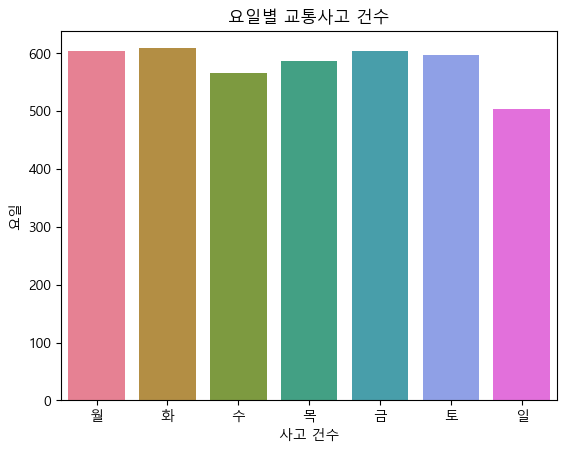

In [27]:
sns.barplot(day.index,day,palette='husl') # x = day.index, y = day.index
plt.title('요일별 교통사고 건수')
plt.xlabel('사고 건수')
plt.ylabel('요일')
plt.show()

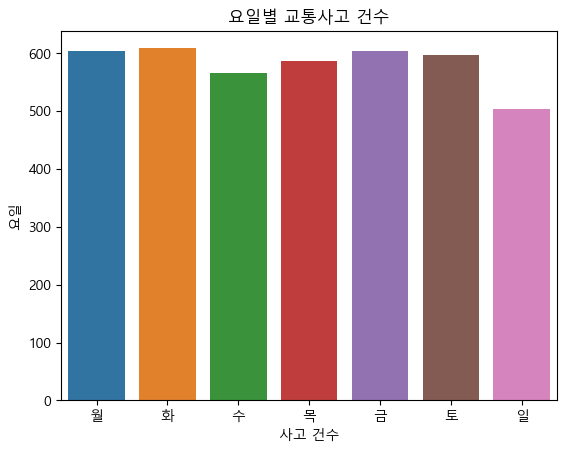

In [28]:
# palette='husl' 를 사용하지 않았을 경우 
sns.barplot(day.index,day) # x = day.index, y = day.index
plt.title('요일별 교통사고 건수')
plt.xlabel('사고 건수')
plt.ylabel('요일')
plt.show()

#### 차대차 사건중 사상자수가 많은 발생지 시도 시각화

In [29]:
acc_data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [30]:
np.unique(acc_data['사고유형'])

array(['공작물충돌', '기타', '길가장자리구역통행중', '도로이탈 기타', '도로이탈 추락', '보도통행중', '전도',
       '전도전복', '전복', '정면충돌', '주/정차차량 충돌', '차도통행중', '철길건널목', '추돌', '측면충돌',
       '횡단중', '후진중충돌'], dtype=object)

In [31]:
np.unique(acc_data['사고유형_대분류'])

array(['차대사람', '차대차', '차량단독', '철길건널목'], dtype=object)

In [32]:
car_acc=acc_data.query('사고유형_대분류=="차대차"')
car_acc[['발생지시도','사상자수']]

,발생지시도,사상자수
0,전남,2
2,충남,2
8,제주,3
9,충남,7
17,경북,2
...,...,...
4050,경남,1
4055,광주,6
4058,경북,1
4060,경남,4


In [33]:
s_car_acc=car_acc[['발생지시도','사상자수']].groupby('발생지시도',as_index=False).sum()
s_car_acc

,발생지시도,사상자수
0,강원,214
1,경기,824
2,경남,248
3,경북,287
4,광주,87
5,대구,115
6,대전,61
7,부산,107
8,서울,197
9,세종,17


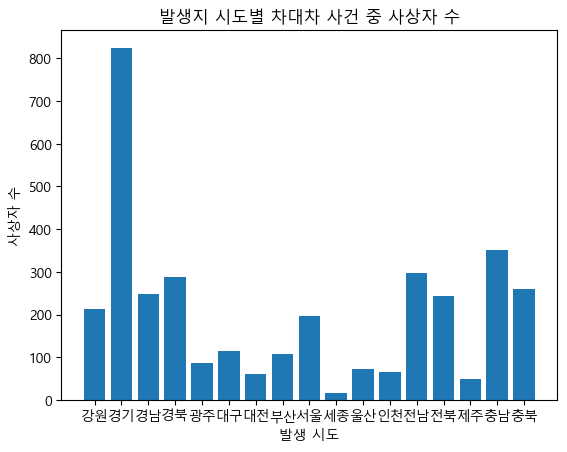

In [102]:
# 시각화
plt.bar(s_car_acc['발생지시도'], s_car_acc['사상자수'])
plt.title('발생지 시도별 차대차 사건 중 사상자 수')
plt.ylabel('사상자 수')
plt.xlabel('발생 시도')
plt.show()

#### pie chart

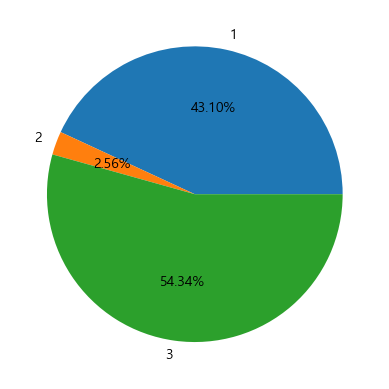

In [37]:
np.random.seed(2)
x=np.arange(1,4)
y=np.random.rand(3)

plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()

#### 교통사고가 가장 많이 발생하는 시간대 시각화

In [41]:
acc_data['발생년월일시']

0       2017010101
1       2017010102
2       2017010102
3       2017010102
4       2017010104
           ...    
4060    2017123118
4061    2017123118
4062    2017123119
4063    2017123120
4064    2017123123
Name: 발생년월일시, Length: 4065, dtype: int64

In [63]:
acc_time=acc_data['발생년월일시']%100
acc_time

0        1
1        2
2        2
3        2
4        4
        ..
4060    18
4061    18
4062    19
4063    20
4064    23
Name: 발생년월일시, Length: 4065, dtype: int64

In [88]:
acc_time_cnt=acc_time.value_counts().sort_index()
acc_time_cnt

0     167
1     128
2     126
3     105
4     159
5     180
6     196
7     130
8     140
9     171
10    173
11    182
12    141
13    158
14    173
15    182
16    170
17    198
18    271
19    230
20    191
21    169
22    151
23    174
Name: 발생년월일시, dtype: int64

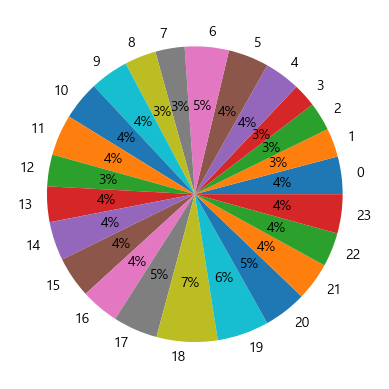

In [89]:
# 파이차트 시각화
plt.pie(acc_time_cnt,labels=acc_time_cnt.index,autopct='%1.0f%%')
plt.show()

In [104]:
# cut 함수를 이용하여 시간대를 8개의 카테고리로 나눠서 시각화
# 0~2, 3~5, 6~8, 9~11, 12~14, 15~17, 18~20, 21~23 : 24 구간을 8 구간으로 
bins=[-1,2,5,8,11,14,17,20,23]
labels=['0~2', '3~5', '6~8', '9~11', '12~14', '15~17', '18~20', '21~23']

acc_time2=pd.cut(acc_time,bins=bins,labels=labels)
acc_time2_cnt=acc_time2.value_counts()
acc_time2_cnt

18~20    692
15~17    550
9~11     526
21~23    494
12~14    472
6~8      466
3~5      444
0~2      421
Name: 발생년월일시, dtype: int64

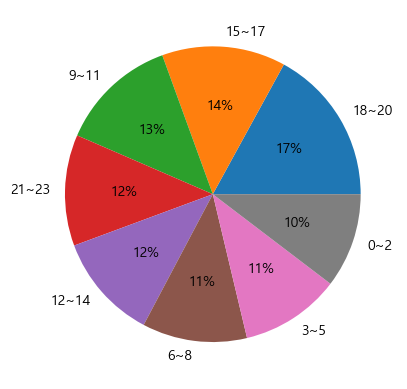

In [105]:
# 파이차트 시각화
plt.pie(acc_time2_cnt,labels=acc_time2_cnt.index,autopct='%1.0f%%')
plt.show()

#### 광주지역 법규위반 사항별 사고건수 시각화

In [106]:
gj_data=acc_data.query('발생지시도=="광주"')
gj_data2=gj_data['법규위반'].value_counts()
gj_data2

안전운전 의무 불이행        70
신호위반               14
과속                 12
중앙선 침범              8
보행자 보호의무 위반         6
안전거리 미확보            2
기타(운전자법규위반)         2
앞지르기 방법위반           1
부당한 회전              1
직진 및 우회전차의 통행방해     1
Name: 법규위반, dtype: int64

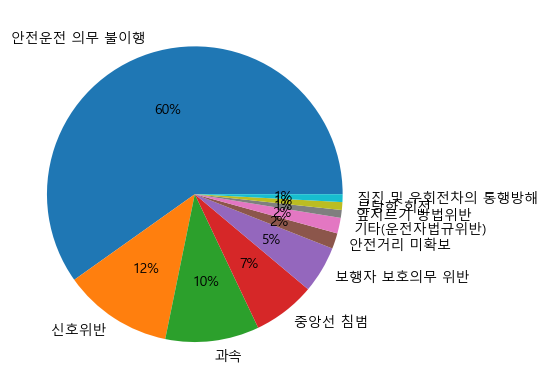

In [107]:
plt.pie(gj_data2,labels=gj_data2.index,autopct='%1.0f%%')
plt.show()